In [77]:
import pandas
import pickle
import datetime
import time
import pytz
import numpy as np

In [78]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

In [79]:
def get_minutes_elapsed(dt_no_tz, start_hour=9, start_minute=30, timezone='US/Eastern'):
    end_dt = dt_no_tz.astimezone(pytz.timezone(timezone))
    
    t = datetime.time(start_hour, start_minute)
    start_dt = datetime.datetime.combine(end_dt, t, tzinfo=end_dt.tzinfo)
    
    delta = end_dt - start_dt
    
    return round(delta.total_seconds() / 60, 2)

In [80]:
t = pandas.read_pickle("../output/trades.pickle")
t = t[t['distance'] > 0.25]
t['elapsed_minutes'] = t.apply(lambda x: get_minutes_elapsed(x['entry_time']), axis=1)


In [88]:
boundaries = [*range(0,450+1, 5)]
boundaries = [round(x) for x in boundaries]

# OVERALL FREQUENCY DISTRIBUTION OF TRADES

<AxesSubplot:>

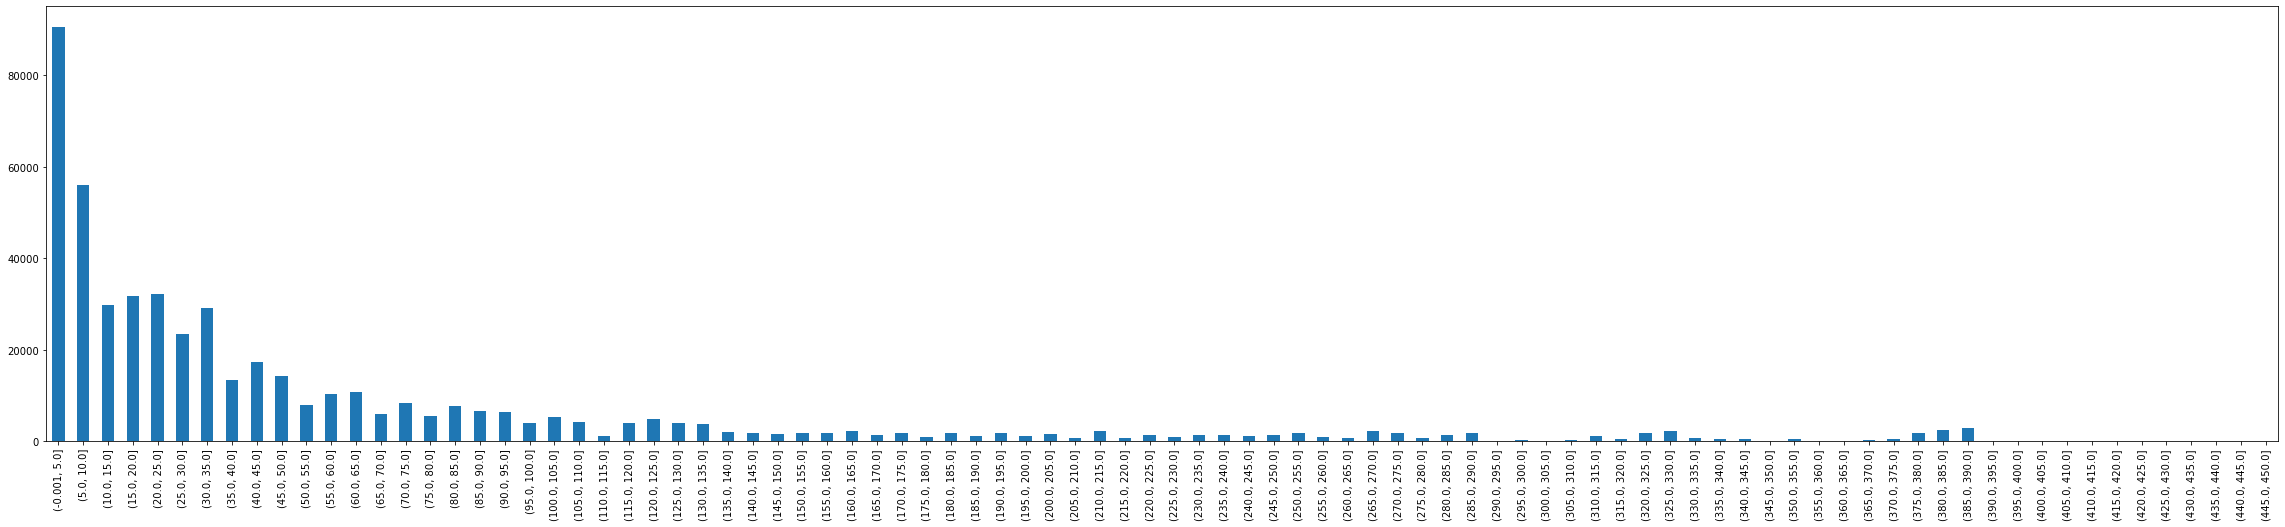

In [92]:
t_elapsed_minutes_buckted = t['elapsed_minutes'].value_counts(bins=boundaries, sort=False)
t_elapsed_minutes_buckted_df = pandas.DataFrame({'elapsed_minutes': t_elapsed_minutes_buckted})
t_elapsed_minutes_buckted_df["elapsed_minutes"].plot(kind='bar', figsize=(40, 8))

# DISTRIBUTION OF GOOD AND BAD TRADES

In [93]:
t_good = t[t['r'] > 0]
t_bad = t[t['r'] < 0]

In [94]:
good_bins = t_good['elapsed_minutes'].value_counts(bins=boundaries, sort=False)
bad_bins = t_bad['elapsed_minutes'].value_counts(bins=boundaries, sort=False)

In [95]:
delta = (good_bins - bad_bins) / (good_bins + bad_bins)
delta_df = pandas.DataFrame({'delta': delta})
delta_df['delta_n'] = delta_df['delta'] - delta_df['delta'].mean()

<AxesSubplot:>

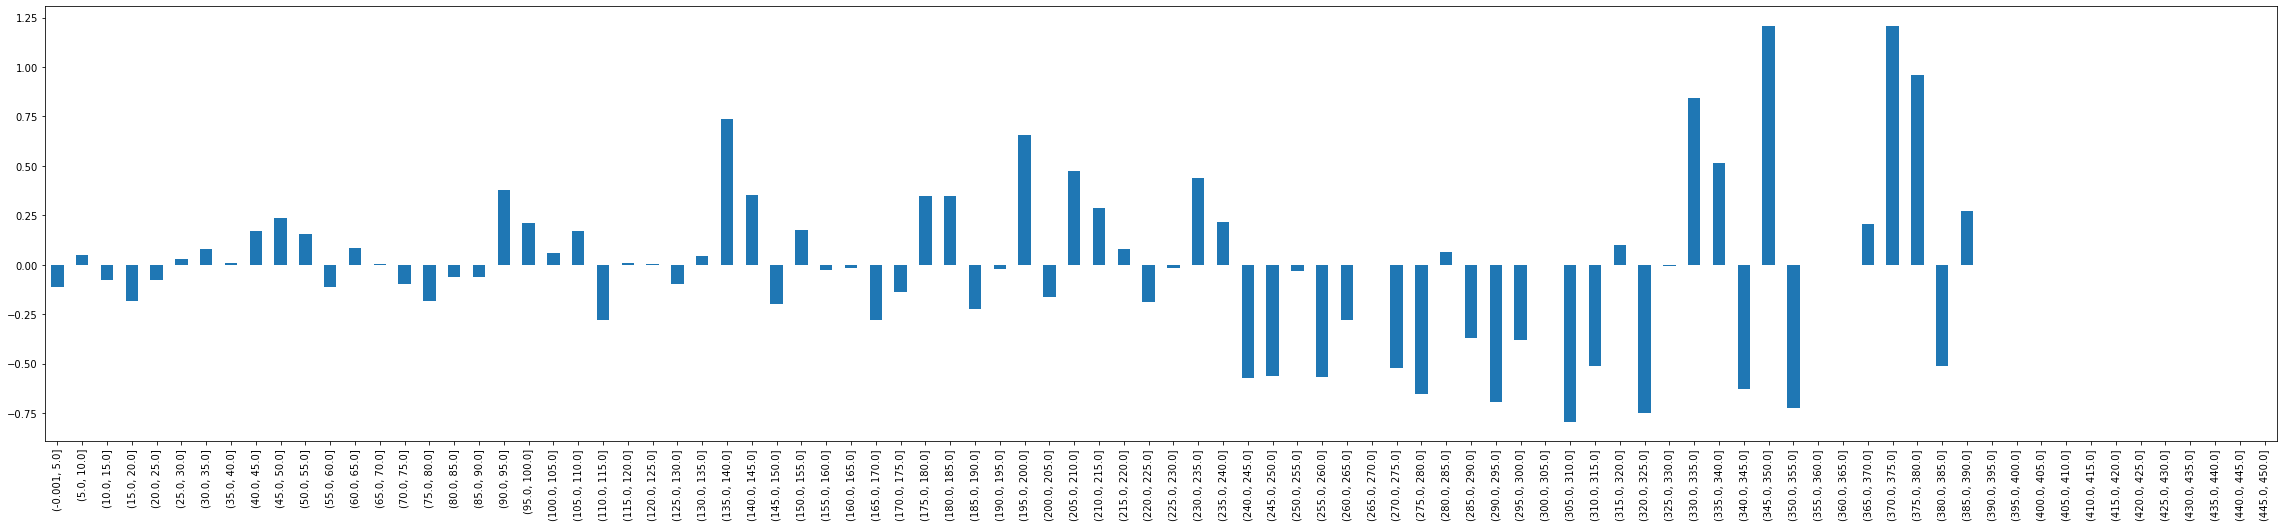

In [96]:
delta_df['delta_n'].plot(kind='bar', figsize=(40, 8))